In [22]:
from modules.dataprocessor import DataProcessorDocs
from modules.cluster import ClusterKmeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
dp = DataProcessorDocs()
file_count = 200

In [24]:
dp.set_paths([f"data/document_{i}.txt" for i in range(file_count)])
dp.generate_tfidf()

In [25]:
similarities = dp.calculate_similarities()

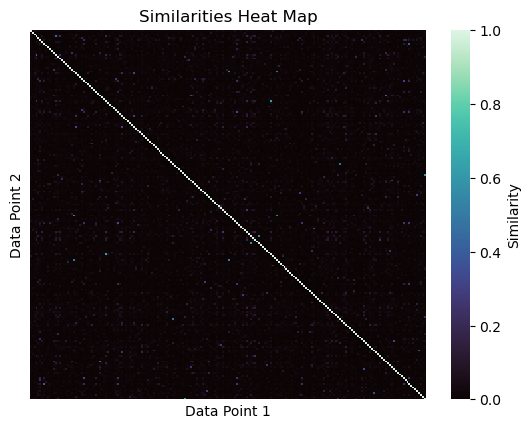

In [26]:
heatmap = sns.heatmap(similarities, cmap='mako', xticklabels=False, yticklabels=False)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Similarity')

plt.xlabel('Data Point 1')
plt.ylabel('Data Point 2')
plt.title('Similarities Heat Map')
plt.show()

As I look at this, I can guess that k-means is the most suitable algorithm for clustering this kind of data.

So I went to the first cell and imported KMeans from sklearn.

Other suitable options would be:
- DBSCAN
- Hierarchical clustering (like dendograms)

We will try them as well to see which is the most suitable and performant

In [27]:
k = 100
clusters = ClusterKmeans(similarities, k).clusters

clusters

{62: [0, 2],
 94: [1],
 6: [3, 13, 15],
 2: [4, 70],
 28: [5, 167, 193],
 54: [6, 97, 109, 112, 150],
 41: [7, 137, 191],
 56: [8, 20, 190],
 50: [9, 130],
 81: [10, 83],
 88: [11],
 7: [12, 21, 67, 99],
 31: [14, 164],
 48: [16, 80],
 44: [17],
 35: [18, 118],
 39: [19, 125],
 25: [22, 100, 124],
 24: [23, 46, 52],
 20: [24, 91, 108, 139],
 58: [25, 76],
 3: [26, 43, 73, 87, 93],
 9: [27, 44, 104, 188],
 12: [28, 134, 155, 157],
 96: [29],
 1: [30],
 85: [31, 61],
 99: [32],
 75: [33, 197],
 19: [34],
 21: [35, 179],
 30: [36, 86, 186],
 53: [37],
 55: [38, 121],
 59: [39, 56, 174],
 57: [40],
 61: [41, 77],
 10: [42, 162],
 8: [45, 113, 154, 176, 180],
 98: [47],
 90: [48],
 42: [49, 75],
 26: [50, 66, 166, 198],
 68: [51, 65],
 64: [53, 60],
 82: [54, 55],
 40: [57, 117, 146],
 69: [58, 64],
 4: [59, 84, 189],
 14: [62, 132, 173, 196],
 80: [63, 110],
 91: [68],
 49: [69, 152],
 74: [71],
 34: [72, 156, 169],
 0: [74, 187],
 60: [78, 199],
 27: [79, 148],
 18: [81, 182],
 70: [82, 9

# Problem
This solution using TF-IDF/Cosine similarity has a problem. Consider these sentences:

*My schoolmates are good lads*

*My collegemates are fine people*

These two senteces are very similar, but as the "are" is a common word, and its the only term that these two sentences share, the TF-IDF score would be pretty low for these terms.

# Solution
The solution is to use one of these algorithms
- LSA (Latent Semantic Analysis)
- Word Embedding (Word2Vec, Glove)
- ConceptNet